<a href="https://colab.research.google.com/github/hassankirwa/NumPy/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description:This program predicts if a passenger will survive on the titanic

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Loadthe data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of the data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#count the number of rows and columns in the titanic dataset
titanic.shape

(891, 15)

In [5]:
#Get some statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Get a count of the number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

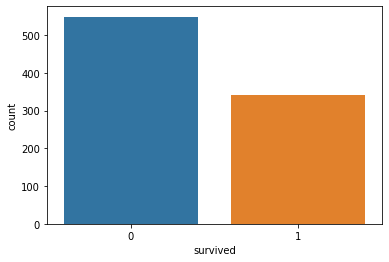

In [7]:
 #Visualize the count of survivors
 sns.countplot(titanic['survived'])

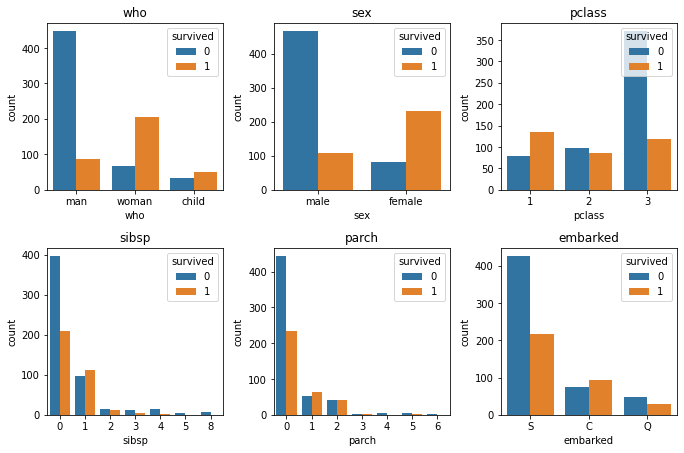

In [8]:
#Visualize the count of survivors for columns 'who','sex','pclass','sibsp','parch','embarked'
cols =['who','sex','pclass','sibsp','parch','embarked']
n_rows = 2
n_cols = 3
#The subplot grid and figure size of each graph
fig,axs =plt.subplots(n_rows,n_cols,figsize =(n_cols*3.2,n_rows*3.2))
for r in range(0,n_rows):
  for c in range(0,n_cols):
    i = r*n_cols + c #index to go through the number of columns
    ax =axs[r][c]#Show where to position each subplot
    sns.countplot(titanic[cols[i]],hue=titanic['survived'],ax =ax)
    ax.set_title(cols[i])
    ax.legend(title='survived',loc ="upper right") 
plt.tight_layout()



In [9]:
#Survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [10]:
#Look at survival rate by sex and class
titanic.pivot_table('survived',index = 'sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


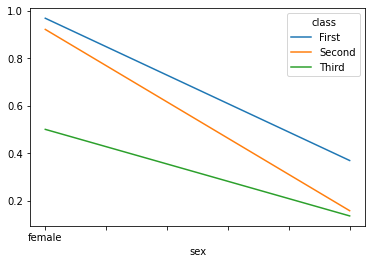

In [11]:
#Look at survival rate by sex and class visually
titanic.pivot_table('survived',index = 'sex',columns='class').plot()

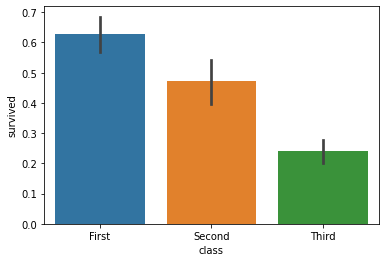

In [12]:
#Plot survival rate of each class
sns.barplot(x ='class',y ='survived', data = titanic)

In [13]:
#Look at survival rate by sex,age and class
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

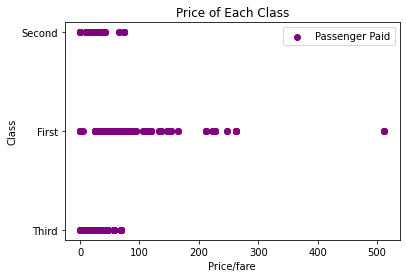

In [14]:
#Prices paid for each class
plt.scatter(titanic['fare'],titanic['class'],color ='purple',label ='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [15]:
 #Count the empty values in each column

 titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
#look at all of the values in each column and a count
for val in titanic:
  print(titanic[val].value_counts())
  print()


0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
#Drop the columns
#titanic = titanic.drop(['deck','embark_town','class','who','alone','adult_male'],axis=1)
#Remove the rows with missing values
titanic = titanic.dropna(subset=['embarked','age'])

In [18]:
# Count the new number of rows and columns in the data set
titanic.shape

(712, 15)

In [19]:
#Look at the data types
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [20]:
#Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#Encode the sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[ :, 2].values)
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[ :, 7].values)


In [22]:
#Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [23]:
titanic.dtypes

survived          int64
pclass            int64
sex               int64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked          int64
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [24]:
#split the data into independent 'x' and dependent 'y'variables
X = titanic.iloc[:,1:8].values
Y = titanic.iloc[:,0].values


In [25]:
#Splitthe dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state =0)

In [26]:
#Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
#Create a function with many machine learning models
def models(X_train,Y_train):

  #use logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train,Y_train)

  # Use KNeighbours
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5,metric ='minkowski', p=2)
  knn.fit(X_train,Y_train)

  #Use SVC(linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel ='linear',random_state=0)
  svc_lin.fit(X_train,Y_train)

  #Use SVC(RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel ='rbf',random_state=0)
  svc_rbf.fit(X_train,Y_train)

  #Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train,Y_train)

  #Use DecisonTree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion ='entropy',random_state=0)
  tree.fit(X_train,Y_train)

  #Use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state = 0)
  forest.fit(X_train,Y_train)

#Print the training accuracy for each model

  print('[0]Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
  print('[1]K Neighbours Training Accuracy:', knn.score(X_train,Y_train))
  print('[2]SVC Linear Training Accuracy:', svc_lin.score(X_train,Y_train))
  print('[3]SVC RBF Training Accuracy:', svc_rbf.score(X_train,Y_train))
  print('[4]GaussianNB Training Accuracy:', gauss.score(X_train,Y_train))
  print('[5]Decision Tree Training Accuracy:', tree.score(X_train,Y_train))
  print('[6]Random Forest Training Accuracy:', forest.score(X_train,Y_train))

  return log, knn, svc_lin, svc_rbf, tree, forest



In [49]:
#Get and train all models
model = models(X_train,Y_train)


[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]K Neighbours Training Accuracy: 0.8664323374340949
[2]SVC Linear Training Accuracy: 0.7768014059753954
[3]SVC RBF Training Accuracy: 0.8506151142355008
[4]GaussianNB Training Accuracy: 0.8031634446397188
[5]Decision Tree Training Accuracy: 0.9929701230228472
[6]Random Forest Training Accuracy: 0.9753954305799648
